# ¿Que vamos a ver hoy?

## Nociones de eventos y variables estadísticas

- Ejemplo discreto: DNI y cartas 
- Ejemplo continuo: largo de lápices
  
## Nociones de funciones de distribución y de densidad de distribución

- Función uniforme, continua y discreta.
- Bernoulli, discreta. 
- Binomial, discreta.
- Poisson, discreta con T y $\lambda$ parametros continuos.
- Exponencial, continua.
- Normal/gaussiana, continua.


# Hagamos un experimento

- Pregunta x paridad de nro de documento.
- Pasar a presentación 
- Charlamos idea de probabilidad discreta.
- Pedir que midan los lapices

In [1]:
import numpy as np
import seaborn as sns

In [7]:
# Vamos a hacer un ejemplo con codigo de lo que queremos ver en el ejemplo de los DNI

def contar_n_muestras(nro_muestras, opciones = ["par","impar"], buscado = "par"):
    if not buscado in opciones:
        raise ValueError(f'El valor buscado {str(buscado)} no esta entre los especificados en las opciones a elegir: {str(opciones)}.') # Ponemos esto porque sino no va a dar error, simplemente va a funcionar mal dando que siempre encuentra cero coincidencias
    resultado = np.random.choice(opciones,nro_muestras)
    coincidencias = resultado == buscado
    return coincidencias.sum()

def hacer_n_experinmentos(nro_muestras, nro_experimentos, opciones = None, buscado = None):
    resultado = []
    for i in range(nro_experimentos):
        if opciones:
            if buscado:
                elemento = contar_n_muestras(nro_muestras, opciones = opciones, buscado = buscado)
            else:
                elemento = contar_n_muestras(nro_muestras, opciones = opciones)
        else:
            if buscado:
                elemento = contar_n_muestras(nro_muestras, buscado = buscado)
            else:
                elemento = contar_n_muestras(nro_muestras)
        resultado = resultado + [elemento]
    return resultado


    

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

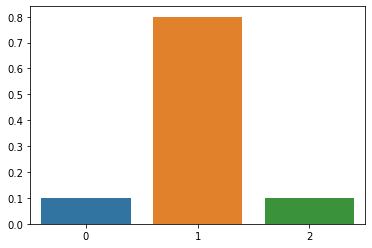

In [5]:
nro_muestras = 2
nro_experimentos = 10
unique, counts = np.unique(hacer_n_experinmentos(nro_muestras,nro_experimentos), return_counts=True)
#print (unique)
#print (counts)
sns.barplot(unique, counts/counts.sum())

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

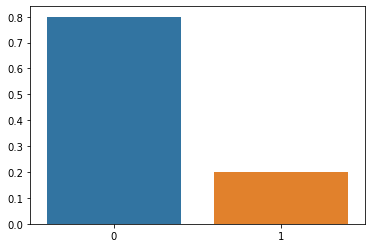

In [17]:
nro_muestras = 1
nro_experimentos = 10
unique, counts = np.unique(hacer_n_experinmentos(nro_muestras,nro_experimentos,opciones = [1,2,3,4,5,6], buscado = 1), return_counts=True)
#print (unique)
#print (counts)
sns.barplot(unique, counts/counts.sum())

In [23]:
# Vamos a ver como procesar la info de los lapices.

largos = [15,14.9,13,16.3,15.3,20,10,15.1,14.8,17.4,13.6]


[15.  14.9 13.  16.3 15.3 20.  10.  15.1 14.8 17.4 13.6]


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

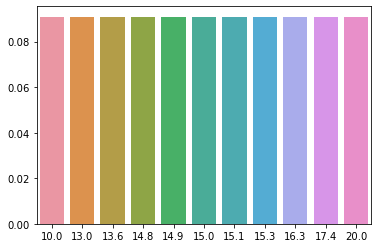

In [24]:
data = np.array(largos)
print (data)
# hagamos lo mismo:
unique, counts = np.unique(data, return_counts=True)
sns.barplot(unique, counts/counts.sum())

# Preguntas para pensar
- ¿Cual es la probabilidad de que un lapiz mida 15.2?
- ¿Y que mida 12?
- ¿Son la misma?

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


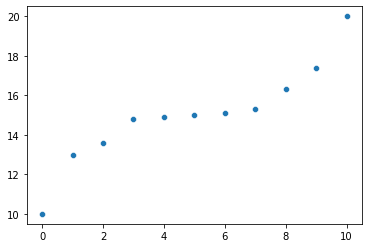

In [32]:
data.sort()
x = np.arange(len(data))
grafico = sns.scatterplot(x,data)


La probabilidad de que el valor este entre 14.5 y 15.5 es 45.45454545454545%


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


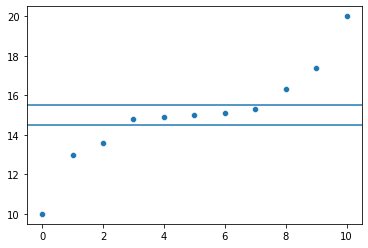

In [57]:
# Cual es la probabilidad de que el valor del largo este entre 10 y 12?

cota_sup = 15.5
cota_inf = 14.5

condicion = (cota_inf < data) & (data <= cota_sup)
# La probabilidad son los caso favorables sobre los totales
print (f'La probabilidad de que el valor este entre {cota_inf} y {cota_sup} es {condicion.sum()/len(condicion)*100}%')
grafico = sns.scatterplot(x,data)
grafico.axhline(cota_sup)
grafico.axhline(cota_inf)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


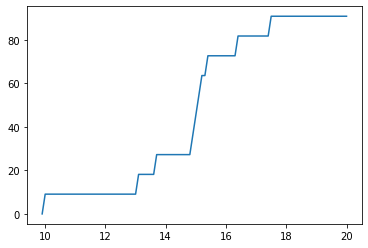

In [64]:
# Vamos a contruir la probabilidad acumulada
paso = 0.1

probabilidad_acumulada = []

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (limite_inf < data) & (data <= deslizador)
    probabilidad_acumulada.append(condicion.sum()/len(condicion)*100)
    
grafico = sns.lineplot(np.arange(data.min()-paso,data.max()+paso,paso),probabilidad_acumulada)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


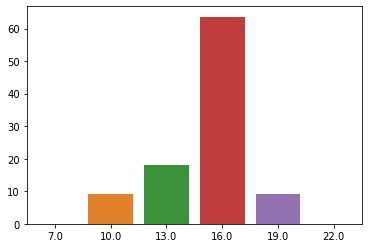

In [68]:
# Vamos a construir la densidad de probabilidad
paso = 3

densidad_probabilidad = []
for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (deslizador - paso/2 < data) & (data <= deslizador + paso/2)
    densidad_probabilidad.append(condicion.sum()/len(condicion)*100) 
    
grafico = sns.barplot(np.arange(data.min()-paso,data.max()+paso,paso),densidad_probabilidad)